# Diagnosing Lipohypertrophy 

### MDS Capstone Project with the Gerontology Diabetes Research Lab (GDRL)

#### Proposal Report Prepared by: Ela Bandari, Peter Yang, Lara Habashy and Javairia Raza

#### Mentor: Tomas Beuzen

#### Capstone Partner: Dr. Ken Madden 

<br>

## 1. Executive Summary

Subclinical lipohypertrophy is traditionally evaluated based on visual inspection or palpation. However, recent work has shown that lipohypertrophy may be detected by ultrasound imaging. The criteria used to classify lipohypertrophy using ultrasound imaging is only familiar to and implemented by a small group of physicians. In an effort to improve the accessibility and efficiency of this method of detection, our capstone partner has asked us to explore the possibility of using supervised machine learning to detect lipohypertrophy on ultrasound images. 

In this project, we will be creating a convolutional neural network to detect the presence of lipohypertrophy in ultrasound images. We will be testing a variety of image preprocessing and transfer learning methodologies to select our finalized machine learning pipeline. Our proposed data product is a Python application that can intake new ultrasound images and make accurate predictions on the presence or absence of lipohypertrophy. 

<br>

## 2. Introduction

Lipohypertrophy is a common complication for diabetic patients who inject insulin (Kapeluto et al., 2018). It is defined as the growth of fat cells and fibrous tissue with lowered vascularity in the skin following repeated trauma of insulin injection in the same area. Our focus is on subclinical hypertrophy which forms in the subcutaneous layer (the deepest layer of the skin) (Lumen, 2021). It is critical that insulin is not injected into areas of lipohypertrophy as it reduces the effectiveness of the insulin such that patients are unable to manage their blood sugar levels and may require more insulin to achieve the same therapeutic benefits (Kapeluto et al., 2018). Fortunately, research by Kapeluto et al. (2018) has found ultrasound imaging techniques are more accurate in finding these masses than a physical examination of the body by a healthcare professional. But, currently, the criteria to classify lipohypertrophy using ultrasound imaging is only implemented by a small group of physicians (Madden, 2021). To expand the usability of this criteria to a larger set of healthcare professionals, the capstone partner is interested in seeing if we could leverage supervised machine learning techniques to accurately classify the presence of lipohypertrophy given an ultrasound image. 

### 2.1 Anticipated Data Product

Our objective as the data science team is to build a binary classification convolutional neural network (CNN) model that classifies an ultrasound image into two classes, lipohypertrophy present or lipohypertrophy is not present. A CNN model is a common technique used to classify image data into binary categories. A secondary objective of this work is to utilize object detection techniques to classify the location of hypertrophy, if present, on an ultrasound image.


There are three identified levels of technical abstraction for the final data product:

1. The first level of abstraction and the minimum viable product for this capstone project is a well-documented and reproducible machine learning pipeline. The source code from this analysis acts as a proof-of-concept for using a supervised learning approach to address the problem of detecting subclinical lipohypertrophy. 

2. The second level of abstraction includes deploying the model to a cloud-based service and creating an interface where users will be able to interact with it to obtain predictions on unseen data. 

3. The final level of abstraction is creating a python application using tools such as `pyinstaller`. This would allow healthcare workers to easily interact with our final data product without any prior knowledge of programming. 

<br>

## 3. Data Science Techniques

A previous study (Kapeluto et al., 2018) classified ultrasound images as containing hypertrophy ("positive") or not containing lipohypertrophy ("negative") based on expert knowledge and objectively-developed criteria. These images and mappings will be used to develop the CNN. Efforts were made to crop the images to discard their borders and other annotated information, keeping only the core ultrasound image.

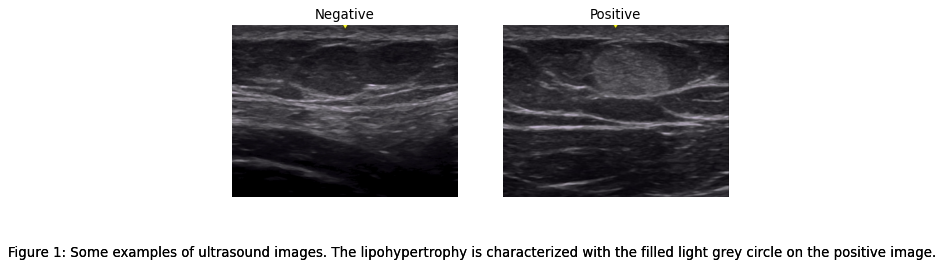

In [112]:
# hide this code cell
from matplotlib.pyplot import figure, imshow, axis, figtext
from matplotlib.image import imread

files = {"Negative": '../image/lipo_negative.png', "Positive": '../image/lipo_positive.png'}

fig = figure(figsize=(8, 6), dpi=80)
for i, key in enumerate(list(files.keys())):
    a=fig.add_subplot(1,len(files),i+1)
    a.set_title(key)
    image = imread(files[key])
    imshow(image)
    axis('off')
    txt="Figure 1: Some examples of ultrasound images. The lipohypertrophy is characterized with the filled light grey circle on the positive image."
    figtext(0.5, 0.20, txt, horizontalalignment='center', fontsize=12)

The processed data consists of 263 images, a scarce yet fairly balanced dataset. The counts and proportion of positive and negative observations are shown in the table below. 

|  | Positive | Negative |
| --- | --- | --- |
| Count | 135 | 128 |
| Proportion | 51% | 49% |

Due to the relatively small size of the dataset, data augmentation (the process of creating additional samples as augmented versions of original samples) was performed, using techniques such as randomly flipping and/or rotating the images. Data augmentation can help expand the data available to train a model and hence improve model performance. We plan on further investigating additional data augmentation techniques such as contrast and brightness adjustment, scaling, and shifting. 

Furthermore, we have created a Python script to split the data into train, validation, and test sets. This is standard practice when developing machine learning models and facilitates data reading into PyTorch and allows the team to have holdout samples to validate model results.

The processed data will be used to train a CNN model using a technique called transfer learning. Transfer learning is the process of applying an existing pre-trained model to a new dataset, and is common practice in deep learning. A popular choice in deep learning applications is the *densenet* model which will serve as our baseline model. 

In our preliminary application, the baseline model is trained on the pre-processed data, yielding a validation accuracy score of 82% after 20 epochs (i.e. 20 passes of the entire training dataset). We further explored the baseline model’s performance by examining the feature importances on several observations. Below is an example of a positive observation (i.e. lipohypertrophy present). The highlighted areas are areas that the model believes are significant for deriving the prediction. We can observe that the model is highlighting areas where lipohypertrophy is located.

Text(0.5, 0.1, 'Figure 2: Feature Importance. The lighter orange and yellow areas on the right represent areas that the baseline model thinks are important')

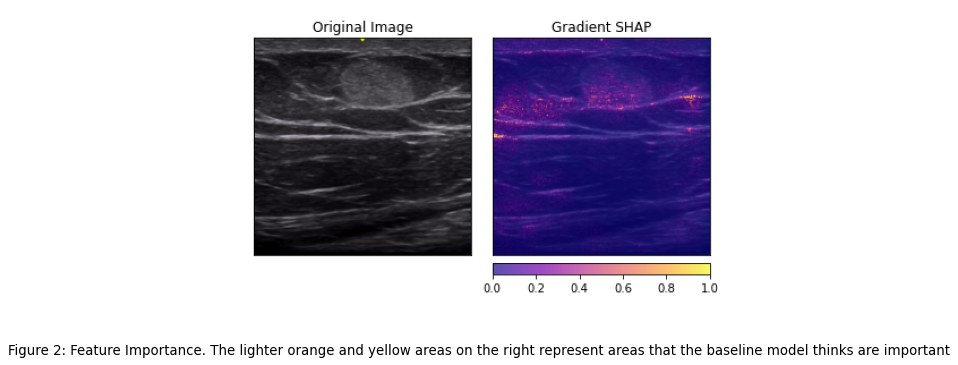

In [113]:
# hide code cell and figure out how to get ride of caption
fig = figure(figsize=(8, 6), dpi=80)
a=fig.add_subplot(1,1,1)
image = imread("../image/proposal_feature_importance.PNG")
imshow(image)
axis('off')
txt = "Figure 2: Feature Importance. The lighter orange and yellow areas on the right represent areas that the baseline model thinks are important"
figtext(0.5, 0.10, txt, horizontalalignment='center', fontsize=12)

To evaluate the CNN model's performance, we will consider both accuracy and recall scores. Recall is a ratio of true positives to false negatives with a higher score reflecting less false negatives which is of interest here. False negatives are critical to avoid from the healthcare providers’ perspective as administering insulin in a region that the model detected did not have lipohypertrophy when in fact there is lipohypertrophy present would be detrimental in managing diabetes. 

Our review of the literature flagged other popular deep learning architectures that have been successful across a wide range of problems. As a second approach, we plan on utilizing the *VGG* architecture, proposed by Karen Simonyan and Andrew Zisserman in the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition". The *VGG* architecture has proven successful in applications with small images and combats the large memory requirement of the *densemodels* architecture. Our research also demonstrated that a *VGG* pre-trained  CNN model is slow to train as its learned weights are rather large. Therefore, we plan on exploring *Inception*, proposed in the paper "Going Deeper with Convolutions" (Szegedy et. al, 2014). We plan on modeling the performance of a variety of tuned CNN architectures against the baseline model to determine the most appropriate architecture. 

<br>

## 4. Timeline

We have divided our project up into 3 phases.

1. In Phase 1 (weeks 1 to 3), we aim to configure the most appropriate image pre-processing and CNN architectures by testing a variety of transfer learning techniques. 

2. In Phase 2 (weeks 4 to 6), we aim to implement higher levels of sophistication to our data product to improve its accessibility to a non-technical audience. 

3. In Phase 3 (weeks 6 to 8), we aim to complete our final data product, final report, and final presentation and add additional functionality such as object detection if time permits.  

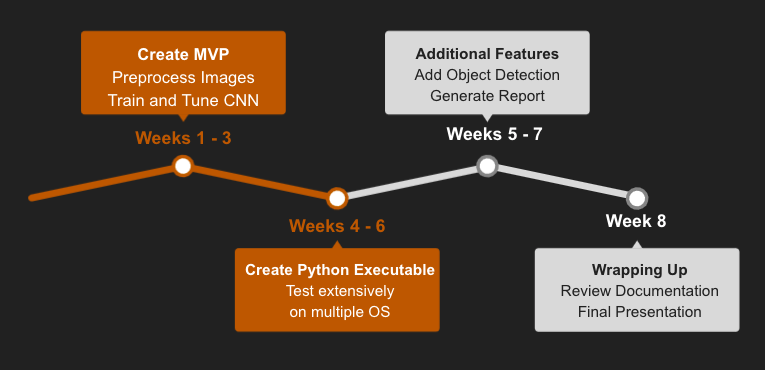


<br>

#### References 

- Barzin, M. (2016, July 14). How to display images in a row with IPython display? Stack Overflow.https://stackoverflow.com/questions/36006136/how-to-display-images-in-a-row-with-ipython-display
- Kapeluto, J.E., Paty, B.W., Chang, S.D. & Meneilly, G.S. (2018). Ultrasound detection of insulin-induced lipohypertrophy in Type 1 and Type 2 diabetes. Diabetic Medicine, 35(10), 1383-1390. https://doi.org/10.1111/dme.13764
- Lumen (2021, May 7). The Skin. Boundless Anatomy and Physiology. https://courses.lumenlearning.com/boundless-ap/chapter/the-skin/
- Madden, K. (2021, May 7). Machine Learning Approaches to: 1. Diagnosing Lipohypertrophy at the bedside, and 2. Falls Prediction in Long Term Care. https://github.ubc.ca/MDS-2020-21/DSCI_591_capstone-proj_students/blob/master/proposals/md/Machine_Learning_Approaches_to_Diagnosing_Lipohypertrophy_and_Predicting_Falls.md
- Shoeb, Abu. (2018, July 23). Adding caption below X-axis for a scatter plot using matplotlib. Stack Overflow.https://stackoverflow.com/questions/34010205/adding-caption-below-x-axis-for-a-scatter-plot-using-matplotlib
- Simonyan, K. & Zisserman, A. (2015). Very Deep Convolutional Networks for Large-Scale Image Recognition [Conference session]. ICLR 2015:San Diego. https://arxiv.org/pdf/1409.1556.pdf 
- Szegedy, C., Liu, W., Jia, Y., Sermanet, P., Reed, S., Anguelov, D., Dumitru, E., Vanhoucke, V. & Rabinovich, A. (2015). Going deeper with convolutions. IEEE:Conference on Computer Vision and Pattern Recognition (CVPR), Boston. 10.1109/CVPR.2015.7298594